<a href="https://colab.research.google.com/github/yleessam/datascience/blob/main/20%EC%B0%A8%EC%8B%9C_%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 데이터분석 실습

# 순서
0. 데이터 확인
1. 필요 라이브러리 임포트 및 파일 읽어오기
2. EDA 탐색적 데이터 분석
3. 데이터 전처리 수행
 - 필요한 컬럼 정리
 - 컬럼 데이터 정제
 - Null 처리
 - 컬럼 type 변경하기
4. 데이터 시각화
5. 결과 저장

# #0. 데이터의 확인

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

- 통신사 고객 데이터를 분석해서 고객을 유지하고 고객 이탈률을 줄이기 위한 전략을 탐색한다.

- Churn은 서비스를 중단하거나 업계의 경쟁업체로 이전한 고객 또는 사용자를 의미하는데, 목표는 기존 고객을 유지하고 새로운 고객을 유치하는 것입니다.

- 이 과정을 통해 우리는 정확한 고객이탈 예측 모델을 개발할 수 있습니다.

# * Telco Customer Churn Dataset  컬럼

---


1. CustomerID: Customer ID unique for each customer
2. gender: Whether the customer is a male or a female
3. SeniorCitizen: Whether the customer is a senior citizen or not (1, 0) : 고령자 여부
4. Partner: Whether the customer has a partner or not (Yes, No)
5. Dependents: Whether the customer has dependents or not (Yes, No) : 부양가족 여부
6. Tenure: Number of months the customer has stayed with the company : 서비스 사용 개월수
7. PhoneService: Whether the customer has a phone service or not (Yes, No)
8. MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
9. InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
10. OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
11. OnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service)
12. DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
13. TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
14. StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
15. StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
16. Contract: The contract term of the customer (Month-to-month, One year, Two years)
17. PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
18. PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. MonthlyCharges: The amount charged to the customer monthly
20. TotalCharges: The total amount charged to the customer
21. Churn: Whether the customer churned or not (Yes or No) : 이탈 여부

# #1. 필요 라이브러리 임포트 및 파일 읽어오기

In [1]:
import numpy as np

In [3]:
import pandas as pd

## CSV 파일 데이터 읽어오기

In [6]:
df = pd.read_csv('대웅_example/판다스입문_codes/data/cust_data_v1.csv')

In [8]:
# 읽어온 데이터프레임 확인하기
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,...,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,...,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# #2. 탐색적 데이터 분석

## 데이터 탐색하기

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7034 non-null   object 
 2   SeniorCitizen     7042 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7041 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7040 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  3580 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7042 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 자료구조 파악

In [15]:
df.shape

(7043, 21)

## 데이터 타입, 인덱스, 컬럼명, Values 확인

In [18]:
df.dtypes

customerID           object
gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [20]:
df.index

RangeIndex(start=0, stop=7043, step=1)

In [22]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [24]:
df.values[:5]

array([['7590-VHVEG', nan, 0.0, 'Yes', 'No', 1, 'No', 'No phone service',
        'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', nan, 'Yes',
        'Electronic check', 29.85, '29.85', 'No'],
       ['5575-GNVDE', 'Male', 0.0, 'No', 'No', 34, 'Yes', 'No', 'DSL',
        'Yes', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'No',
        'Mailed check', 56.95, '1889.5', 'No'],
       ['3668-QPYBK', 'Male', 0.0, 'No', 'No', 2, 'Yes', 'No', 'DSL',
        'Yes', 'Yes', nan, 'No', 'No', 'No', 'Month-to-month', 'Yes',
        'Mailed check', 53.85, '108.15', 'Yes'],
       ['7795-CFOCW', 'Male', 0.0, 'No', 'No', 45, 'No',
        'No phone service', 'DSL', 'Yes', 'No', nan, 'Yes', 'No', 'No',
        'One year', 'No', 'Bank transfer (automatic)', 42.3, '1840.75',
        'No'],
       ['9237-HQITU', 'Female', 0.0, 'No', 'No', 2, 'Yes', 'No',
        'Fiber optic', 'No', 'No', nan, 'No', 'No', 'No',
        'Month-to-month', 'Yes', 'Electronic check', 70.7, '151.65',
        'Yes']], dtype=object)

## Null 데이터 확인

In [27]:
df.isnull().sum()

customerID             0
gender                 9
SeniorCitizen          1
Partner                0
Dependents             2
tenure                 0
PhoneService           3
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection    3463
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               1
PaperlessBilling       0
PaymentMethod          1
MonthlyCharges         1
TotalCharges           0
Churn                  0
dtype: int64

## 통계 정보

In [30]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7042.000000,7043.000000,7042.000000
mean,0.162170,32.371149,64.763256
std,0.368633,24.559481,30.091898
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# #3. 데이터 전처리 수행

## 자료구조 파악

## 컬럼 삭제

1. customerID: 각 고객의 고유 ID로, 분석이나 모델링에 기여하는 정보는 포함하고 있지 않습니다. 주로 데이터베이스 관리용으로 쓰이며 예측이나 인사이트를 제공하지 않기 때문에 제거해야 한다고 판단했습니다.

2. MultipleLines: 이 컬럼은 고객의 다중 전화선 사용 여부를 나타낼 수 있지만, 분석에 필요한 주요 변수가 아닐 가능성이 있습니다. 전화 서비스 관련 다른 변수와 중복되거나 상관관계가 높은 경우라면, 모델의 복잡성을 줄이기 위해 제거하는 것이 좋습니다.

3. StreamingTV 및 StreamingMovies: 이 두 컬럼은 각각 TV와 영화 스트리밍 사용 여부를 나타내지만, 데이터 분석에서 그다지 유용하지 않거나 별다른 변동성이 없을 수 있습니다. 그래서 두 컬럼을 합치는 것이 적합하다고 판단했습니다.

4. PaperlessBilling: 이 컬럼은 고객이 종이 없는 청구서를 사용하는지 여부를 나타내지만, 청구서 형식이 고객 이탈에 큰 영향을 미치지 않는 경우가 많습니다. 또한, 데이터에 큰 변동성이 없거나 특정한 인사이트를 제공하지 않는다면, 이 변수를 제외할 수 있습니다.

In [34]:
#불필요한 컬럼 삭제
col_drop = ['customerID', 'MultipleLines', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
# 'StreamingTV', 'StreamingMovies' 컬럼을 하나로 통합
df['StreamingService'] = df[['StreamingTV', 'StreamingMovies']].apply(
    lambda x: 'Yes' if 'Yes' in x.values else 'No', axis=1
)
df.drop(columns=[col for col in col_drop if col in df.columns], inplace=True)

In [36]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,StreamingService
0,NaN,0.0,Yes,No,1,No,DSL,No,Yes,No,No,NaN,Electronic check,29.85,29.85,No,No
1,Male,0.0,No,No,34,Yes,DSL,Yes,No,Yes,No,One year,Mailed check,56.95,1889.5,No,No
2,Male,0.0,No,No,2,Yes,DSL,Yes,Yes,NaN,No,Month-to-month,Mailed check,53.85,108.15,Yes,No
3,Male,0.0,No,No,45,No,DSL,Yes,No,NaN,Yes,One year,Bank transfer (automatic),42.30,1840.75,No,No
4,Female,0.0,No,No,2,Yes,Fiber optic,No,No,NaN,No,Month-to-month,Electronic check,70.70,151.65,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0.0,Yes,Yes,24,Yes,DSL,Yes,No,Yes,Yes,One year,Mailed check,84.80,1990.5,No,Yes
7039,Female,0.0,Yes,Yes,72,Yes,Fiber optic,No,Yes,Yes,No,One year,Credit card (automatic),103.20,7362.9,No,Yes
7040,Female,0.0,Yes,Yes,11,No,DSL,Yes,No,No,No,Month-to-month,Electronic check,29.60,346.45,No,No
7041,Male,1.0,Yes,No,4,Yes,Fiber optic,No,No,No,No,Month-to-month,Mailed check,74.40,306.6,Yes,No


## 컬럼 내용 변경하기

범주형 문자 데이터를 숫자 변환하는것은 성능에 많은 영향을 미치므로 꼭 변환한다.<br>
null, _ 같은 문제있는 문자 데이터를 모델링하기 전에 미리 다른 데이터로 변경, 혹은 삭제한다.

- TotalCharges 컬럼 타입 변경하기

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7034 non-null   object 
 1   SeniorCitizen     7042 non-null   float64
 2   Partner           7043 non-null   object 
 3   Dependents        7041 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7040 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  3580 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  Contract          7042 non-null   object 
 12  PaymentMethod     7042 non-null   object 
 13  MonthlyCharges    7042 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
 16  StreamingService  7043 non-null   object 


In [42]:
df.isnull().sum()

gender                 9
SeniorCitizen          1
Partner                0
Dependents             2
tenure                 0
PhoneService           3
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection    3463
TechSupport            0
Contract               1
PaymentMethod          1
MonthlyCharges         1
TotalCharges           0
Churn                  0
StreamingService       0
dtype: int64

In [44]:
# TotalCharges가 문자열 형식일 경우, 숫자 형식으로 변환 (변환할 수 없는 값은 결측치로 처리)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [46]:
# TotalCharges 컬럼에서 변환 중 발생한 결측치를 평균으로 채우기
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

C:\Users\KDW\AppData\Local\Temp\ipykernel_6920\4185624681.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


In [114]:
df['TotalCharges'].isnull().sum()

0

In [ ]:
# 시각화에서 'SeniorCitizen'이 TypeError: '<' not supported between instances of 'method' and 'float'가 떠서 하는 전처리
# SeniorCitizen 컬럼이 숫자형인지 확인하고 변환
df['SeniorCitizen'] = pd.to_numeric(df['SeniorCitizen'], errors='coerce')
# 결측치 확인 및 처리
df['SeniorCitizen'].fillna(0, inplace=True)  # 결측치를 0으로 대체 (필요시 다른 방식으로 처리)

- Churn 컬럼의 문자열값을 숫자로 변경

In [52]:
# (Yes -> 1, No -> 0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

## Null 데이터 확인

In [60]:
df.isnull().sum()

gender              0
SeniorCitizen       1
Partner             0
Dependents          0
tenure              0
PhoneService        0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
Contract            0
PaymentMethod       0
MonthlyCharges      1
TotalCharges        0
Churn               0
StreamingService    0
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7042 non-null   float64
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  Contract          7043 non-null   object 
 12  PaymentMethod     7043 non-null   object 
 13  MonthlyCharges    7042 non-null   float64
 14  TotalCharges      7043 non-null   float64
 15  Churn             7043 non-null   int64  
 16  StreamingService  7043 non-null   object 


- 결측치 처리

데이터에 결측치 있으면 모델링시 알지 못하는 에러 발생할수 있으므로 반드시 결측치를 제거나 변경해야 한다.<br>
결측치 제거시 dropna() 함수 활용하면 된다.<br>
결측치를 변경시 변경하는 방법이 꼭 정답이 아니며, 여러가지 판단하고 고민이 필요하다.<br>
주로, 문자형 컬럼에 대해 최빈값으로 , 숫자형 컬럼에 대해 중간값으로 결측치 대신해서 채울수 있다.

In [58]:
# 문자형 컬럼 결측치 처리(최빈값)
for col in df.select_dtypes(include = ['object']).columns:
    m_frequent_value = df[col].mode()[0] # 최빈값 계산
    df[col].fillna(m_frequent_value, inplace=True)

C:\Users\KDW\AppData\Local\Temp\ipykernel_6920\1459704727.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(m_frequent_value, inplace=True)


In [64]:
# 숫자형 컬럼 결측치 처리(중간값)
for col in df.select_dtypes(include = ['number']).columns:
    median_value = df[col].median # 중간값 계산
    df[col].fillna(median_value, inplace=True)

C:\Users\KDW\AppData\Local\Temp\ipykernel_6920\1603057249.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.median of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    1.0
7042    0.0
Name: SeniorCitizen, Length: 7043, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[col].fillna(median_value, inplace=True)
C:\Users\KDW\AppData\Local\Temp\ipykernel_6920\1603057249.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.median of 0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64>' has dtype incomp

In [70]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
Contract            0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
StreamingService    0
dtype: int64

# #4. 시각화

## 라이브러리 임포트
1. Churn (이탈 여부) : 이탈한 고객과 유지된 고객 수를 비교할 수 있고, 전체 고객 중 이탈 비율을 한눈에 파악할 수 있음.
2. Contract (계약 유형) : 계약 유형(월별, 1년, 2년 계약)에 따른 이탈 여부를 비교하고, 특정 계약 유형이 이탈에 더 민감한지 확인할 수 있음.
3. InternetService(인터넷 서비스 유형) : 인터넷 서비스 유형에 따른 고객 분포와 이탈률을 분석하고, 서비스 유형이 이탈에 미치는 영향을 파악할 수 있음.
4. PaymentMethod (결제 방식) : 결제 방식별로 고객의 분포와 이탈 여부를 비교할 수 있고, 특정 결제 방식이 이탈에 영향을 ㅂ미치는지 알 수 있음.
5. SeniorCitizen (고령자 여부) : 고령자와 비고령자 그룹 간 이탈 여부를 비교하고, 고령자와 비고령자 간에 이탈률 차이를 시각적으로 확인할 수 있음.
6. StreamingService : 스트리밍 서비스 이용 여부에 따라 이탈률이 다른지 분석하고, 추가 서비스 이용 고객이 더 오래 유지되는지 파악할 수 있음.

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid')

## Bar 차트

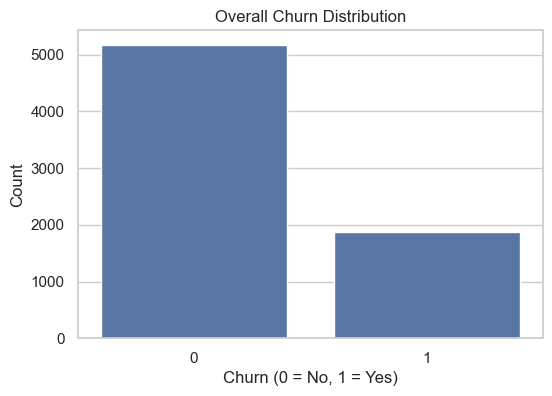

In [90]:
# 1. 전체 Churn 분포
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Overall Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

고객 이탈 여부(Churn)의 전체 분포를 확인합니다.
이탈 여부가 적다는 것을 확인할 수 있습니다.

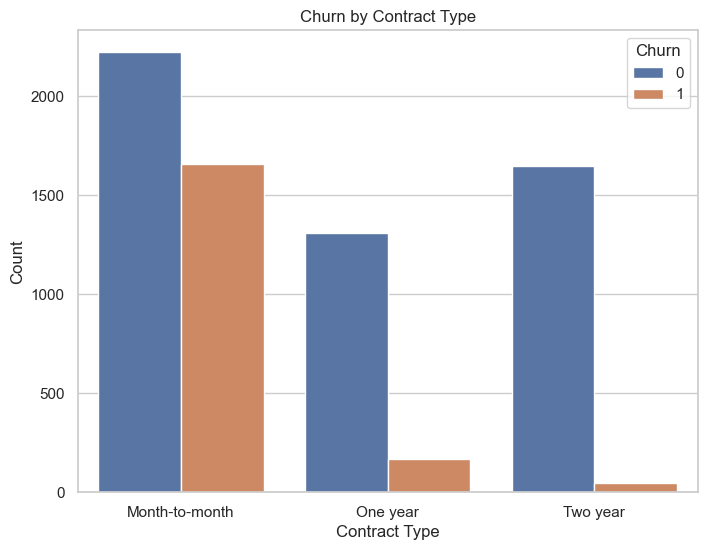

In [88]:
# 2. Contract 유형에 따른 Churn 분포
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

각 계약 유형에 따른 이탈 여부를 비교한다.<br>
1. Month-to-Month: 월 단위 계약을 맺은 고객이 가장 많으며, 이 계약 유형에서 이탈률이 상대적으로 높다. 이는 단기 계약을 맺은 고객이 장기 계약에 비해 이탈률이 높다는 것을 확인 할 수 있다.
2. One Year : 1년 계약을 맺은 고객은 이탈한 고객수가 적어, 고객을 더 오래 유지시키는 것을 확인할 수 있다.
3. Two Year : 2년 계약을 맺은 고객은 이탈할 가능성이 가장 적다. 이는 장기 계약이 고객 이탈을 줄이는 데에 효과적이다.

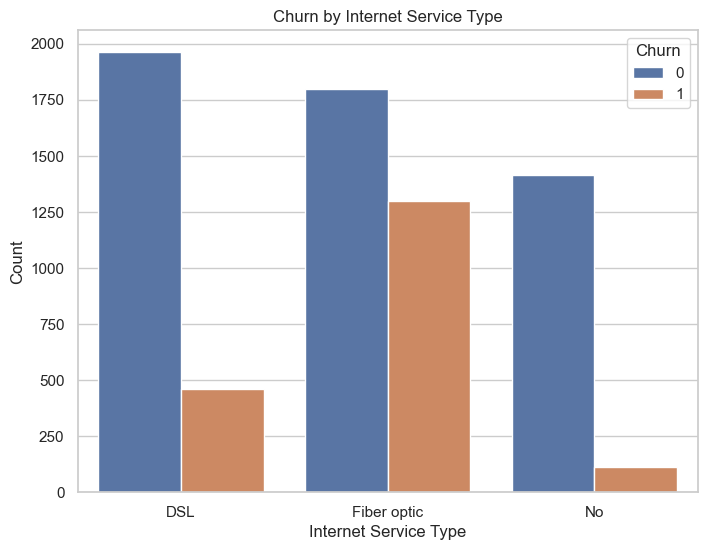

In [101]:
# 3. InternetService 유형에 따른 Churn 분포
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

인터넷 서비스 유형별 이탈 여부를 분석한다.
1. DSL : DSL 사용 고객은 다른 유형에 비해 이탈률이 낮을 수 있다. DSL 서비스 사용 고객이 안정적으로 서비스를 이용하고 있음을 알 수 있다.
2. Fiber Optic : Fiber Optic 사용 고객은 이탈률이 비교적으로 높다. Fiber Optic 사용 고객이 이탈할 가능성이 상대적으로 크다는 것을 나타냄.
3. No : 인터넷 서비스를 사용하지 않는 고객은 이탈률이 제일 적은 것을 확인할 수 있는데, 인터넷 서비스와 관련된 문제나 추가 요금이 없기 때문에 상대적으로 이탈하지 않을 가능성이 높을 것으로 추정됨.

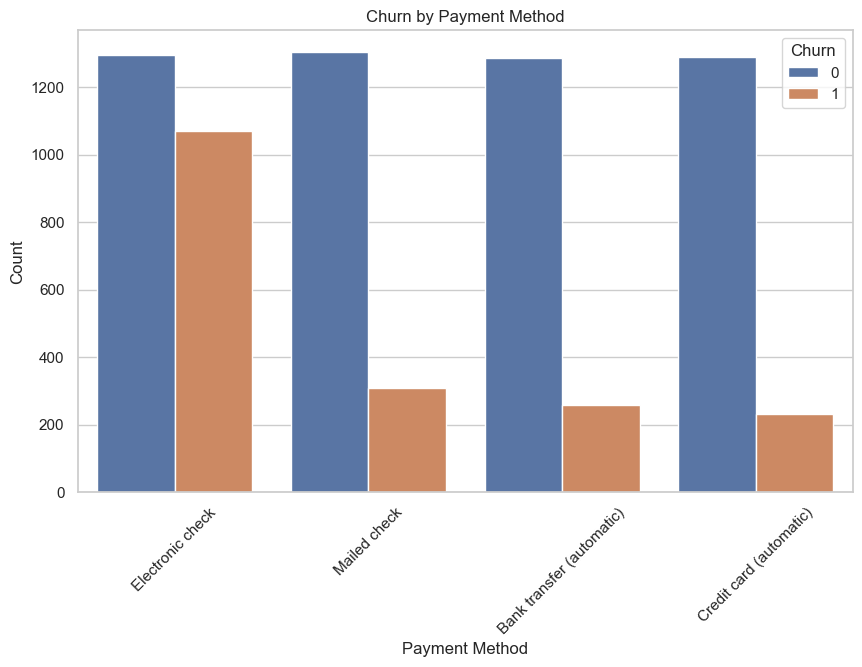

In [105]:
# 4. PaymentMethod에 따른 Churn 분포
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.show()

결제 방식에 따라 이탈률을 비교한다.
1. Electronic check(전자 수표) : 이탈률이 가장 높게 뜨는데 Electronic check는 결제 과정에서 문제가 발생할 가능성이 높아, 고객 이탈의 주요 요인으로 작용할 것이라는 추정.
2. Credit Card (신용카드), Bank Transfer (은행 이체), Mailed Check (우편 수표) : 이 결제 방식들은 이탈률이 낮게 뜨는 것을 볼 수가 있는데 이는 자동 결제 방식을 이용하면 결제 관리가 쉬워지고 이탈 가능성이 줄어드는 경향이라고 추정.

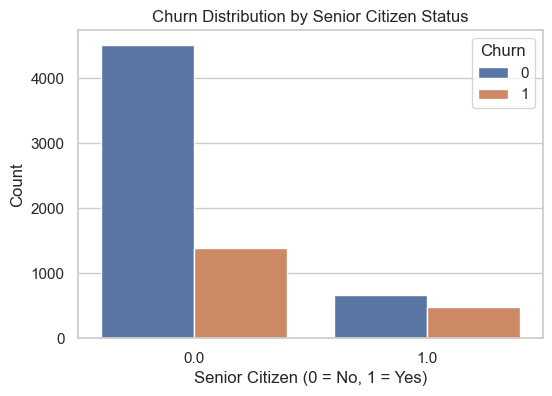

In [118]:
# 5. SeniorCitizen에 따른 Churn 분포
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')
plt.title('Churn by Senior Citizen Status')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

고령자 여부에 따른 고객 이탈률을 비교한다.
1. 비고령자(0) : 비고령자에서 이탈률이 적은 현상을 볼 수 있다. 이는 비고령자가 이탈자 보다는 유지되는 경향이 강하다는 것을 알 수 있다.
2. 고령자(1) : 고령자는 일단 비고령자보다 고객이 적은 것을 확인할 수 있고, 고령자는 전체적으로 유지된 고객수에 비해 이탈률은 높은 것을 알 수 있다.

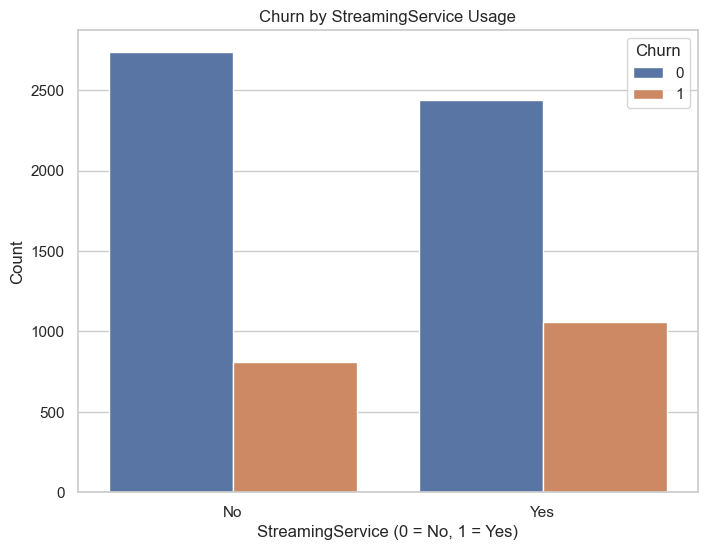

In [124]:
# 6. StreamingService사용 여부에 따른 Churn 분포
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='StreamingService', hue='Churn')
plt.title('Churn by StreamingService Usage')
plt.xlabel('StreamingService (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

스트리밍 서비스 사용 여부에 따른 고객 이탈률을 알 수 있다.
1. 스트리밍 사용하지 않는 고객: 스트리밍을 사용하지 않는 고객들은 이탈보다는 유지되는 것을 알 수 있고, 스트리밍 서비스에 추가 비용이 들거나 필요성을 못 느껴서 사용하지 않는 고객층이라서 안전하다는 결과가 나온 것으로 추정.
2. 스트리밍 사용하는 고객 : 스트리밍을 사용하지 않는 고객에 비해 이탈률이 높다는 것을 알 수 있고, 추가 요금이 부과돼서 비용 문제로 이탈할 가능성이 높은 것으로 추정.

- 불균형 심한 PhoneService 컬럼 삭제

In [127]:
df.drop(columns=['PhoneService'], inplace=True)

## 숫자형 컬럼에 대한 시각화

- Churn 컬럼

In [142]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

- SeniorCitizen 컬럼

In [133]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0.0    5901
1.0    1142
Name: count, dtype: int64

In [135]:
df['SeniorCitizen'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: SeniorCitizen
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [137]:
df['SeniorCitizen'].isnull().sum()

0

## Histgram

In [140]:
# seaborn 라이브러리 임포트
#!pip install seaborn

import seaborn as sns

- tenure 컬럼

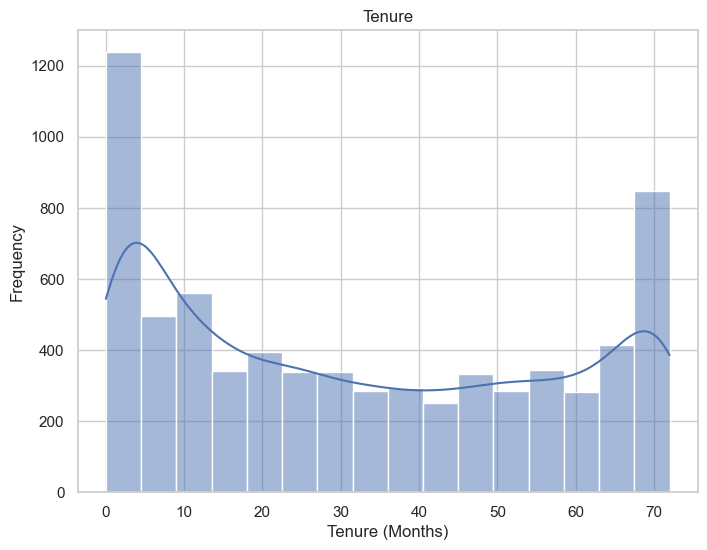

In [148]:
# 3. tenure(가입 기간 분포 확인) 히스토그램
plt.figure(figsize=(8, 6))
sns.histplot(df['tenure'], kde=True)
plt.title('Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()

가입 기간이 주로 어느 범위에 속하는지 파악합니다.
1. 가입 기간이 짧은 고객의 비율 : 가입 기간이 짧은 고객이 많다는 것을 알 수 있고, 최근에 서비스를 가입한 고객이 많다는 것을 추정.
2. 중간 구간 : 가입 기간이 중간 정도인 고객들이 고르게 분포되어 있다면, 이 고객들은 추가적인 유지 전략을 통해 장기 고객으로 전환할 가능성이 클 것이라는 추정.
3. 가입 기간이 긴 고객의 비율 : 가입 기간이 60개월 이상인 고객들의 빈도가 상대적으로 높게 나타내고 있는데 이는 장기 고객층이 충성도가 높은 고객이 많을 것으로 추정.<br>
<br>
! 곡선을 보면 tenure가 짧거나 긴 구간에서는 빈도가 높고, 중간 구간에서는 빈도가 낮은 경향이 있는데, 이는 신규 가입자와 장기 고객층이 많고, 중간 기간에 속한 고객이 적다는 것을 보여준다.

- TotalCharges 컬럼

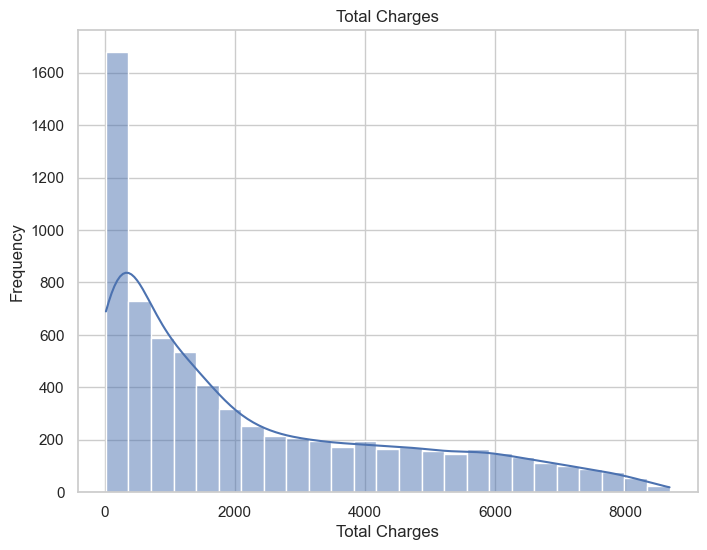

In [155]:
# 2. TotalCharges 히스토그램 - 총 요금 분포 확인
plt.figure(figsize=(8, 6))
sns.histplot(df['TotalCharges'], kde=True)
plt.title('Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

지불한 총 금액의 분포를 나타낸다.
1. 요금이 낮음 고객 : 그래프에서는 왼쪽 부분 빈도가 많은 것을 볼 수 있다. 총 요금이 낮은 고객은 가입한 지 얼마 되지 않았거나, 저렴한 요금제를 사용하고 있을 것으로 추정.
2. 요금이 높은 고객 : 요금이 높은 고객의 빈도가 적은 것을 볼 수 있다. 장기 고객이거나 고가 요금제를 사용하는 고객이 적은 것을 알 수 있다.<br>
<br>
! 이 그래프는 오른쪽으로 꼬리가 긴 오른쪽으로 치우친 분포를 보인다. 대부분의 고객은 낮은 금액대에 집중되어 있으며, 일부 고객만이 높은 TotalCharges를 지불하고 있습니다.

## Countplot

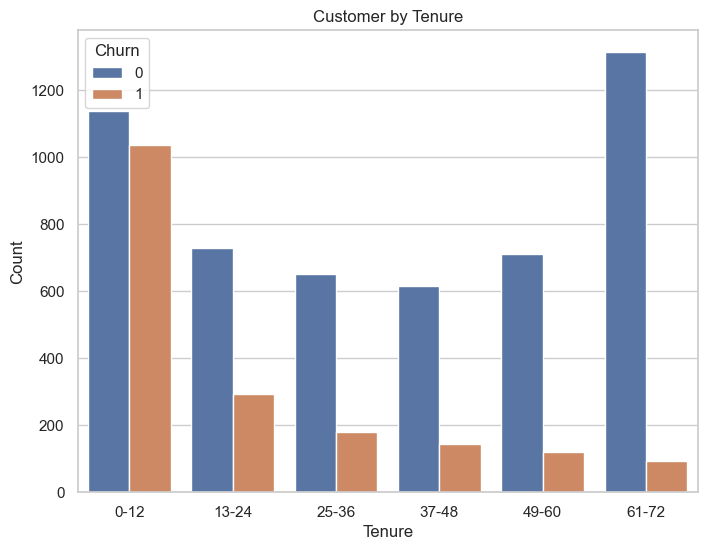

In [164]:
# 가입 기간(tenure)에 따른 고객 이탈(churn) 분포.
# tenure 구간이 너무 많아서 구간별로 나누기
df['tenure_group'] = pd.cut(
    df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], 
    labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']
)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='tenure_group', hue='Churn')
plt.title('Customer by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

가입 기간(tenure)에 따른 고객 이탈(churn)을 알 수 있다.
1. 가입 초기 고객 : 유지된 고객에 대한 이탈 고객의 비율이 매우 높은 것을 알 수 있다. 이는 가입 초기에 이탈하는 고객이 많다는 것을 의미한다.
2. 가입 중간 구간 : 유지 고객 비율이 이탈률 보다 비교적 안정적인 것을 확인 할 수 있다. 이 구간의 고객은 어느 정도 서비스에 익숙해져 있어서 이탈 가능성이 적다고 추정할 수 있다.
3. 가입 기간이 긴 고객 : 길수록 낮은 이탈률이 낮아지고 유지 고객이 많아지는 현상을 볼 수 있다. 이는 장기 가입 고객일수록 서비스에 대한 만족도가 높거나, 서비스에 익숙해져서 이탈 가능성이 낮아진다는 것을 추정할 수 있다.

## heatmap

C:\Users\KDW\AppData\Local\Temp\ipykernel_6920\951848332.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce') # 각 컬럼들을 숫자형으로 변환 그렇지 않은 값은 errors='coerce옵션으로 NAN으로 처리


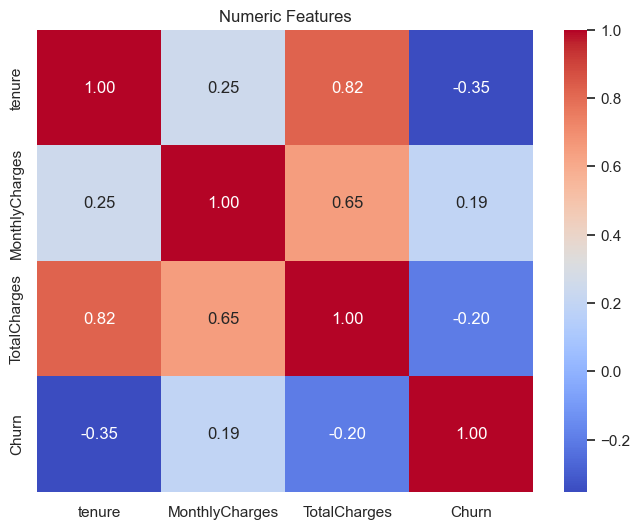

In [182]:
# 숫자형 변수 선택
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
# 숫자형 변수 확인 및 변환
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce') # 각 컬럼들을 숫자형으로 변환 그렇지 않은 값은 errors='coerce옵션으로 NAN으로 처리
# 결측값 처리
df = df.dropna(subset=numeric_columns)
# 상관관계 계산
t_m_t_c_matrix = df[numeric_columns].corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(t_m_t_c_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Numeric Features')
plt.show()

1. tenure(가입 기간), TotalCharges(총 요금) : 0.82로 높은 양의 상관관계가 나타나며, 가입 기간이 길수록 총 지불한 요금이 높아지는 경향을 나타냄.
2. MonthlyCharges(월 요금), TotalCharges(총 요금) : 0.65로 높은 양의 상관관계가 나타나며,월 요금이 높은 고객이 총 요금도 높다는 것을 의미한다.
3.  MonthlyCharges(월 요금), Tenure(가입 기간) : 0.25로 낮은 양의 상관관계를 가진다. 가입 기간이 높을수록 월요금이 높아 질 수 있다는 경향을 가지지만, 그 영향은 강하지 않다.
4. Churn과 나머지 변수 :
- Churn과 TotalCharges의 상관계수는 -0.20으로, 약한 음의 상관관계를 보인다. 이는 총 요금이 높아질수록 이탈 가능성이 약간 줄어들 수 있음을 나타내지만, 큰 영향은 아니다
- Churn과 MonthlyCharges의 상관계수는 0.19로, 약한 양의 상관관계를 보인다. 이는 월 요금이 다소 높을수록 이탈 가능성이 증가할 수 있다는 것을 시사하지만, 그 영향이 강하지는 않다.
- tenure(가입 기간), Churn(이탈률) : -0.35로 중간 정도의 음의 상관관계를 보인다. 가입 기간이 길수록 고객 이탈 가능성이 낮아지는 경향을 나타냄. 반대로 가입 기간이 짧으면 고객 이탈 가능성이 높아지는 경향을 나타냄.

## boxplot

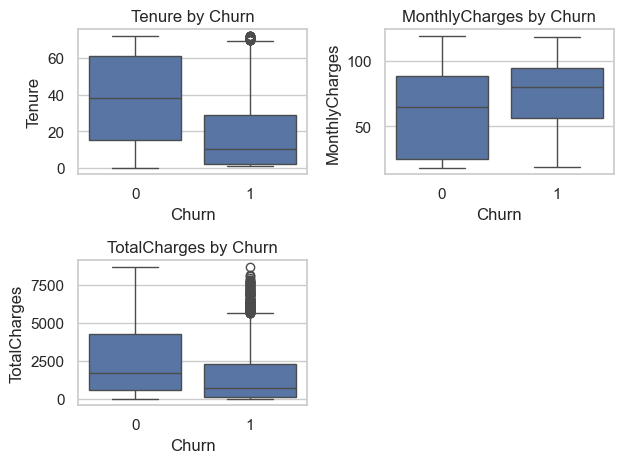

In [199]:
# 1. tenure와 Churn
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')

# 2. MonthlyCharges와 Churn
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('MonthlyCharges by Churn')
plt.xlabel('Churn')
plt.ylabel('MonthlyCharges')

# 3. TotalCharges와 Churn
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title('TotalCharges by Churn')
plt.xlabel('Churn')
plt.ylabel('TotalCharges')

plt.tight_layout()
plt.show()

1. Tenure(가입 기간), Churn(이탈률) : 가입 기간이 긴 고객일수록 유지 고객인 경향이 높고, 짧은 고객일수록 이탈한 고객일 경향이 높다.
2. Monthly Charges(월 요금), Churn(이탈률) : 월 요금의 중앙값과 범위는 비슷하지만, 높은 월 요금은 고객 이탈과 약간의 관령성을 찾을 수 있다. 월 요금이 높을수록 고객에게는 부담이 될 수 있다는 것을 추정.
3. TotalCharges(총 요금), Churn(이탈률) : 유지 고객의 총 요금이 이탈한 고객의 총 요금보다 높습니다. 이탈한 고객의 총 요근은 상대적으로 낮으며, 이상치로 일부 높은 요금을 가진 고객도 존재한다.

# # 5. 결과 저장하기

## 결과를 csv 파일로 저장하기

In [194]:
df.to_csv('대웅_example\판다스입문_codes\data\cust_data_v2.csv', index=False)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\KDW\AppData\Local\Temp\ipykernel_6920\3300684081.py:1: SyntaxWarning: invalid escape sequence '\d'
  df.to_csv('대웅_example\판다스입문_codes\data\cust_data_v2.csv', index=False)


# #X. 랩업
1. 필요 라이브러리 임포트 및 파일 읽어오기 : pd.read_csv()
2. EDA (Exploratory Data Analysis) 탐색적 데이터 분석 : df.info(), df.head(), df.tail()
3. 데이터 전처리 수행
 + 불필요 컬럼 삭제 : df.drop()
 + 컬럼 내용 변경하기 : df.replace()
 + Null 처리 : df.replace(), df.fillna()
 + 컬럼 type 변경하기 : df['col'].astype(int)
4. 시각화
 + matplotlib, seaborn
 + bar, scatter, countplot, boxplot
5. 결과 저장하기
 + to_csv()